In [1]:
%reset -f
%reload_ext autoreload
%autoreload 2

import os
import sys
import importlib
import numpy as np
import pandas as pd

# Set root directory dynamically
ROOT_DIR = r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures'
sys.path.append(ROOT_DIR)
os.chdir(ROOT_DIR)
sys.path.append('M3_modeler')
sys.path.append('M2_data_extractor')
# Remove old module from cache
sys.modules.pop('data_extractor', None)
# Import modules and reload
try:
    os.chdir('M2_data_extractor')
    from data_extractor import Molecules, extract_connectivity
    from feather_extractor import logs_to_feather
    import data_extractor
    import feather_extractor
    import gaussian_handler
    from gaussian_handler import feather_file_handler
    os.chdir('../utils')
    from help_functions import dict_to_horizontal_df, get_df_from_file
    from visualize import show_single_molecule
    import help_functions
    os.chdir('../M3_modeler')
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression
    )
    import plot
    import modeling


    
    
    
except ModuleNotFoundError as e:
    print(f"Error: {e}")
    print("Make sure the module is in the correct directory and the Python environment is set up properly.")

# Ensure Pandas displays all columns
pd.set_option('display.max_columns', None)

# Define paths
log_files_path = None  # Example: r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Blackwell_logs'
if log_files_path:
    logs_to_feather(log_files_path)

feather_path = r'C:\Users\edens\Documents\GitHub\smiles_data\Nadeem_feathers'
# feather_path=r'C:\Users\edens\Documents\GitHub\lucas_project\Secondary_Sphere\feather_benzal'
# feather_path=r'C:\Users\edens\Documents\GitHub\lucas_project\Doyle2021\logfiles\feather_files'
os.chdir(feather_path)

# Load molecular data
mols = data_extractor.Molecules(feather_path)

# Define dictionary of answers
answers_dict = {
    "Ring Vibration atoms": "9",
    "Strech Vibration atoms": "1,2 4,5",
    "Bending Vibration atoms": "22,23",
    "Dipole atoms": "11,6 4 10,11,12 11,12 5 4,5,1 4,3,2",
    "NPA manipulation atoms": "11,6 4 10,11,12 11,12,5 4,5,1 4,3,2",
    "Sub-Atoms": "1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25",
    "Charge values": "1,3,5,11,8,12,14",
    "Charge difference": "11,5 3,5 11,12 12,5",
    "Sterimol atoms": "4,6 6,4 4,3 11,6",
    "Bond length": "11,12 6,4 12,13 12,5 12,14 4,3",
    "Bond Angle": "11,6 4,6 4,5 1,5,4,3 11,6,4,5"
}

list_answers = [
    [15,14], [1600], [], [], [],
    [[5,16,17], [13,12,5], [18,2,3]],
    [],
    [[5,16,17], [13,12,5], [18,2,3]],
    [6,12,2,1,15,16],
    [[1,12], [15,6], [2,16]],
    [[15,13], [1,2]],
    [[5,6],[1,12]],
    [[1,2,18], [6,5,3],[16,17,18], [14,13,12,5], [11, 6, 4, 5]]

]


lengths of all dataframes: NBO: 39, Hirshfeld: 39, CM5: 39, XYZ: 39
lengths of all dataframes: NBO: 44, Hirshfeld: 44, CM5: 44, XYZ: 44
lengths of all dataframes: NBO: 45, Hirshfeld: 45, CM5: 45, XYZ: 45
lengths of all dataframes: NBO: 43, Hirshfeld: 43, CM5: 43, XYZ: 43
lengths of all dataframes: NBO: 43, Hirshfeld: 43, CM5: 43, XYZ: 43
lengths of all dataframes: NBO: 33, Hirshfeld: 33, CM5: 33, XYZ: 33
lengths of all dataframes: NBO: 34, Hirshfeld: 34, CM5: 34, XYZ: 34
lengths of all dataframes: NBO: 45, Hirshfeld: 45, CM5: 45, XYZ: 45
lengths of all dataframes: NBO: 40, Hirshfeld: 40, CM5: 40, XYZ: 40
lengths of all dataframes: NBO: 46, Hirshfeld: 46, CM5: 46, XYZ: 46
lengths of all dataframes: NBO: 35, Hirshfeld: 35, CM5: 35, XYZ: 35
lengths of all dataframes: NBO: 41, Hirshfeld: 41, CM5: 41, XYZ: 41
lengths of all dataframes: NBO: 29, Hirshfeld: 29, CM5: 29, XYZ: 29
lengths of all dataframes: NBO: 42, Hirshfeld: 42, CM5: 42, XYZ: 42
lengths of all dataframes: NBO: 43, Hirshfeld: 4

In [2]:
df=mols.get_molecules_comp_set_app(answers_dict=None,answers_list_load=list_answers)
df

None
Found 1 benzene ring(s):
  Ring atoms: [13, 14, 15, 16, 17, 18]
this molecule is  HHQ_optimized
Found 1 benzene ring(s):
  Ring atoms: [13, 14, 15, 16, 17, 18]
this molecule is  MD-106_optimized
Found 1 benzene ring(s):
  Ring atoms: [13, 14, 15, 16, 17, 18]
this molecule is  MD-108_optimized
Found 1 benzene ring(s):
  Ring atoms: [13, 14, 15, 16, 17, 18]
this molecule is  MD-124_optimized
Found 1 benzene ring(s):
  Ring atoms: [13, 14, 15, 16, 17, 18]
this molecule is  MD-125_optimized
Found 1 benzene ring(s):
  Ring atoms: [13, 14, 15, 16, 17, 18]
this molecule is  MD-24_optimized
Found 1 benzene ring(s):
  Ring atoms: [13, 14, 15, 16, 17, 18]
this molecule is  MD-25_optimized
Found 1 benzene ring(s):
  Ring atoms: [13, 14, 15, 16, 17, 18]
this molecule is  MD-28_optimized
Found 1 benzene ring(s):
  Ring atoms: [13, 14, 15, 16, 17, 18]
this molecule is  MD-37_optimized
Found 1 benzene ring(s):
  Ring atoms: [13, 14, 15, 16, 17, 18]
this molecule is  MD-38_optimized
Found 1 benze

,dip_x_NPA_5-16-17,dip_y_NPA_5-16-17,dip_z_NPA_5-16-17,total_dipole_NPA_5-16-17,dip_x_NPA_13-12-5,dip_y_NPA_13-12-5,dip_z_NPA_13-12-5,total_dipole_NPA_13-12-5,dip_x_NPA_18-2-3,dip_y_NPA_18-2-3,dip_z_NPA_18-2-3,total_dipole_NPA_18-2-3,dipole_x_5-16-17,dipole_y_5-16-17,dipole_z_5-16-17,total_dipole_5-16-17,dipole_x_13-12-5,dipole_y_13-12-5,dipole_z_13-12-5,total_dipole_13-12-5,dipole_x_18-2-3,dipole_y_18-2-3,dipole_z_18-2-3,total_dipole_18-2-3,nbo_atom_6,nbo_atom_12,nbo_atom_2,nbo_atom_1,nbo_atom_15,nbo_atom_16,hirshfeld_atom_6,hirshfeld_atom_12,hirshfeld_atom_2,hirshfeld_atom_1,hirshfeld_atom_15,hirshfeld_atom_16,cm5_atom_6,cm5_atom_12,cm5_atom_2,cm5_atom_1,cm5_atom_15,cm5_atom_16,nbo_diff_1-12,nbo_diff_15-6,nbo_diff_2-16,hirshfeld_diff_1-12,hirshfeld_diff_15-6,hirshfeld_diff_2-16,cm5_diff_1-12,cm5_diff_15-6,cm5_diff_2-16,B1_15-13,B5_15-13,L_15-13,loc_B5_15-13,B1_B5_angle_15-13,B1_1-2,B5_1-2,L_1-2,loc_B5_1-2,B1_B5_angle_1-2,bond_length_5-6,bond_length_1-12,"angle_[1, 2, 18]","angle_[6, 5, 3]","angle_[16, 17, 18]","dihedral_[14, 13, 12, 5]","dihedral_[11, 6, 4, 5]"
HHQ_optimized,-1.450510,-0.502523,-0.078000,1.537072,-1.303226,0.811943,0.068854,1.537007,1.357771,-0.716087,-0.078253,1.537025,-6.020847,-2.461136,-0.293552,6.5110,-5.326210,3.736319,0.255679,6.5110,5.910015,-2.716287,-0.295752,6.5110,-0.43358,-0.53082,0.49249,-0.59012,-0.17613,-0.23533,-0.046952,-0.057435,0.111053,-0.308424,-0.032599,-0.048439,-0.147493,-0.416171,0.144220,-0.355536,-0.088208,-0.104167,-0.05930,0.25745,0.72782,-0.250989,0.014353,0.159492,0.060635,0.059285,0.248387,1.7144,5.0013,13.7066,9.9254,126.8172,1.7108,10.1919,8.0828,4.0216,98.2252,1.499586,4.044771,121.850944,123.566675,120.812964,179.664017,77.442956
MD-106_optimized,-1.490451,-0.418847,0.004946,1.548193,-1.360273,0.739165,-0.012373,1.548180,1.323946,-0.802403,0.007670,1.548142,-6.421669,-1.913189,0.288250,6.7068,-5.835346,3.290439,-0.320883,6.7068,5.783894,-3.381980,0.299999,6.7068,-0.42572,-0.53089,0.49256,-0.58886,-0.17586,-0.23494,-0.045967,-0.057749,0.111371,-0.307387,-0.032359,-0.048082,-0.146448,-0.416337,0.144558,-0.354523,-0.087970,-0.103811,-0.05797,0.24986,0.72750,-0.249638,0.013608,0.159453,0.061814,0.058478,0.248369,1.7215,10.1501,9.9780,8.7482,175.0478,1.7119,11.4694,8.8284,3.9868,150.8712,1.499420,4.044718,121.861524,123.558562,120.807992,179.740930,78.102012
MD-108_optimized,-1.849368,-0.441592,0.284964,1.922595,-1.708685,0.838583,-0.271644,1.922659,1.581435,-1.060320,0.267099,1.922643,-7.179399,-2.609244,1.317002,7.7515,-6.436991,4.129153,-1.265562,7.7515,6.800564,-3.508571,1.236396,7.7515,-0.43323,-0.51968,0.46746,-0.56935,-0.17635,-0.24022,-0.047257,-0.062766,0.106082,-0.293898,-0.033421,-0.050923,-0.147675,-0.421033,0.144476,-0.338923,-0.089017,-0.106663,-0.04967,0.25688,0.70768,-0.231132,0.013836,0.157005,0.082110,0.058658,0.251139,1.7091,7.8242,13.5509,8.2456,128.8527,1.7293,10.3878,9.7566,5.3471,106.1943,1.501448,4.041312,122.776876,124.303398,120.827836,179.613100,106.468725
MD-124_optimized,-1.428852,0.094179,0.059317,1.433180,-1.415262,0.221831,-0.045507,1.433265,0.908597,-1.107242,0.053443,1.433314,-5.256856,-0.514261,0.292416,5.2901,-5.018121,1.656657,-0.241763,5.2901,3.971127,-3.484535,0.269577,5.2901,-0.43495,-0.50275,0.45035,-0.63865,-0.17079,-0.04902,-0.047630,-0.054458,0.097401,-0.308557,-0.034785,-0.004039,-0.147176,-0.412340,0.132330,-0.362296,-0.088225,-0.021436,-0.13590,0.26416,0.49937,-0.254099,0.012845,0.101440,0.050044,0.058951,0.153766,2.0122,6.2095,12.1102,9.8208,85.8738,2.0735,9.0233,8.9956,6.9644,99.9234,1.494898,4.035205,124.866630,122.541156,121.613832,179.475037,110.288425
MD-125_optimized,-1.866395,-0.512500,0.095416,1.937831,-1.707378,0.908626,-0.122545,1.937977,1.640555,-1.027280,0.093275,1.937892,-7.093165,-2.873973,0.533011,7.6718,-6.283352,4.355545,-0.636805,7.6718,6.916422,-3.278131,0.523228,7.6718,-0.43293,-0.52614,0.46723,-0.57152,-0.17505,-0.23240,-0.046393,-0.059403,0.105562,-0.295436,-0.039608,-0.052081,-0.147060,-0.422151,0.143955,-0

In [4]:
os.chdir(r'C:\Users\edens\Documents\GitHub\smiles_data')
df.to_csv('combined_features_new.csv', index=True)

In [ ]:
csv_path=r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs\combined_features_new.csv'


csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}

# ('B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12')
Regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=[15,16], min_features_num=2, max_features_num=None, metrics=None, return_coefficients=False)
features_combination=['B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12']
features_combination_2=['dipole_z_11-12-5', 'nbo_atom_14', 'bond_length_11-12', 'bond_length_12-14']
# ('B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12')
plot.generate_and_display_q2_scatter_plot(Regression_model,features_combination_2)
# fit_and_evaluate_single_combination_regression(Regression_model,['B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12'],r2_threshold=0,bool_parallel=False)
# ('Frequency_Bending_22-23', 'angle_[11, 6, 4].1', 'bite_angle_inverted', 'L_[11, 6]')
# ('para', 'angle_[11, 6, 4].1', 'bite_angle_inverted', 'L_[11, 6]')
# ('cross_angle', 'angle_[11, 6, 4].1', 'bite_angle_inverted', 'L_[11, 6]')


Creating table at location: results_combined_features1.db
Table has been created successfully at location: results_combined_features1.db 
Created flag: True
linear model selected
leave_out: [15, 16]
Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Extraction complete. X shape: (31, 4), y shape: (31,)
Fitting the model...
Model fitted successfully.
Generating predictions with covariance calculation...
Predictions generated. pred shape: (31,)
Retrieving coefficient estimates...
Coefficient estimates retrieved:
                   Estimate  Std. Error    t value       p value
(Intercept)        1.061225    0.070488  15.055424  2.375877e-14
dipole_z_11-12-5  -0.222085    0.071449  -3.108315  4.517450e-03
nbo_atom_14        1.447149    0.180271   8.027624  1.658101e-08
bond_length_11-12 -1.683193    0.384669  -4.375686  1.745721e-04
bond_length_12-14  3.258770    0.478050   6.816798  3.098546e-07
Calculating cross-validation metrics for 3-fold CV

Creating table at location: results_pca_data_new1.db
Table has been created successfully at location: results_pca_data_new1.db 
Created flag: True
linear model selected
leave_out: None
Using 1 jobs for evaluation. found 20 cores


Calculating combos with threshold 0.85 (single-core): 100%|██████████| 4845/4845 [00:30<00:00, 157.34it/s]


All Q2 values are -inf, recalculating with a new R2 threshold...
new threshold 0.29211415196984547


Calculating combos with threshold 0.29211415196984547 (single-core): 100%|██████████| 4845/4845 [00:47<00:00, 101.42it/s]


| formula                          |       R.sq |           Q.sq |         MAE |   Model_id |
|:---------------------------------|-----------:|---------------:|------------:|-----------:|
| ('PC2', 'PC4', 'PC8', 'PC17')    | 0.440224   |    0.275308    |    0.610313 |          0 |
| ('PC2', 'PC4', 'PC8', 'PC10')    | 0.423698   |    0.268782    |    0.620759 |          1 |
| ('PC2', 'PC4', 'PC8', 'PC20')    | 0.358633   |    0.2377      |    0.637289 |          2 |
| ('PC2', 'PC4', 'PC8', 'PC13')    | 0.404031   |    0.232824    |    0.607786 |          3 |
| ('PC2', 'PC4', 'PC6', 'PC8')     | 0.385636   |    0.232536    |    0.654409 |          4 |
| ('PC2', 'PC4', 'PC8', 'PC19')    | 0.369804   |    0.231924    |    0.633607 |          5 |
| ('PC2', 'PC4', 'PC7', 'PC8')     | 0.382298   |    0.228984    |    0.64975  |          6 |
| ('PC2', 'PC4', 'PC10', 'PC17')   | 0.381383   |    0.228616    |    0.635465 |          7 |
| ('PC2', 'PC8', 'PC10', 'PC17')   | 0.442114   |    0.21859

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


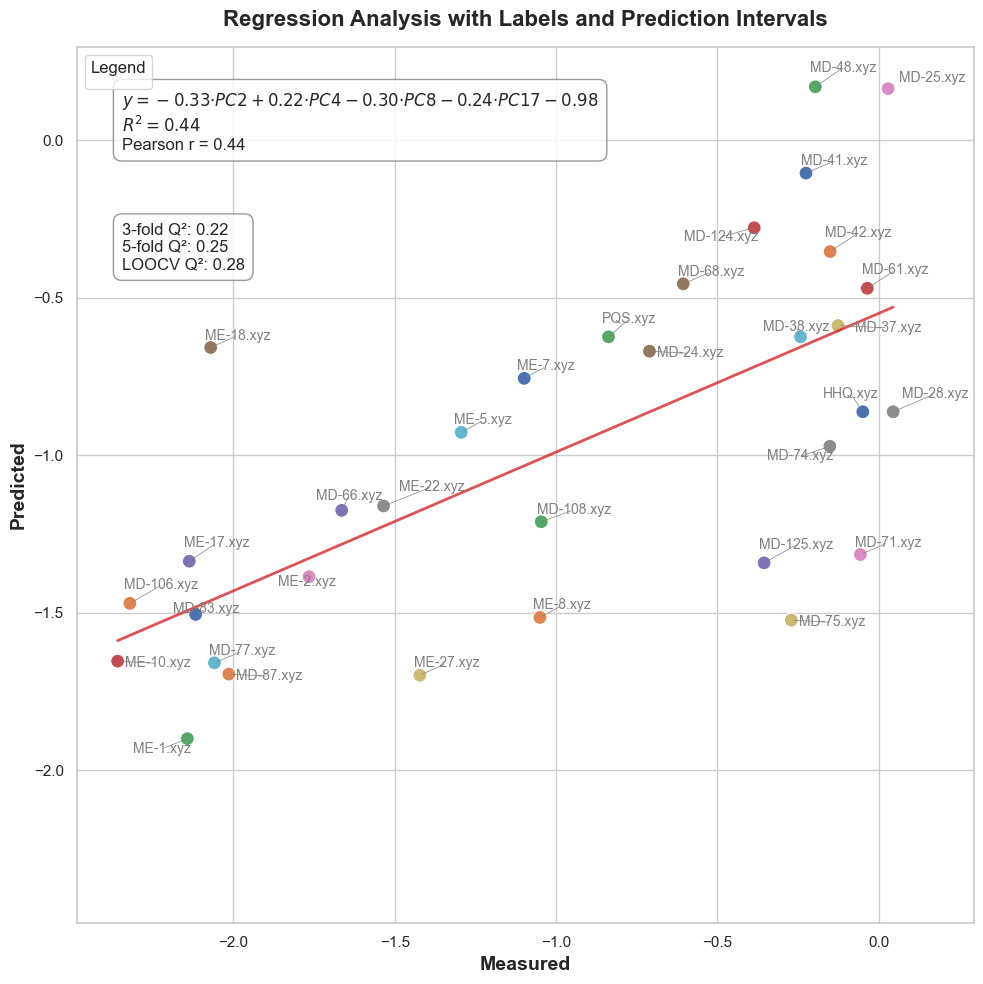

Exiting model selection.


In [3]:
os.chdir(r'C:\Users\edens\Documents\GitHub\smiles_data')
csv_path=r'pca_data_new1.csv'


csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}

Regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=None, min_features_num=4, max_features_num=4, metrics=None, return_coefficients=False)
results=Regression_model.fit_and_evaluate_combinations(top_n=None)

In [12]:
os.chdir(r'C:\Users\edens\Documents\GitHub\lucas_project')
sterimol_df=dict_to_horizontal_df(sterimol)
sterimol_df.to_csv('sterimol_new.csv')

In [8]:
# visualize molecules 0-5 with mols.molecules[0:5] and visualize molecule me
mols.visualize_molecules([0,1,2,3,4,5])

{frozenset({0, 1}): 1.54, frozenset({1, 2}): 1.45, frozenset({2, 3}): 1.34, frozenset({3, 4}): 1.27, frozenset({5, 6}): 1.38, frozenset({6, 7}): 1.39, frozenset({8, 7}): 1.38, frozenset({8, 9}): 1.39, frozenset({9, 10}): 1.33, frozenset({10, 11}): 2.18, frozenset({11, 12}): 2.32, frozenset({13, 14}): 1.09, frozenset({24, 25}): 1.53, frozenset({28, 29}): 1.09, frozenset({29, 30}): 1.09, frozenset({3, 5}): 1.47, frozenset({11, 13}): 1.97, frozenset({13, 15}): 1.09, frozenset({25, 27}): 1.09, frozenset({16, 13}): 1.09, frozenset({26, 29}): 1.09, frozenset({34, 31}): 1.09, frozenset({0, 4}): 1.47, frozenset({35, 31}): 1.09, frozenset({10, 5}): 1.34, frozenset({24, 29}): 1.53, frozenset({36, 31}): 1.09, frozenset({11, 4}): 2.29, frozenset({24, 31}): 1.53, frozenset({32, 25}): 1.09, frozenset({25, 33}): 1.09, frozenset({17, 6}): 1.08, frozenset({18, 7}): 1.08, frozenset({8, 19}): 1.08, frozenset({9, 20}): 1.08, frozenset({24, 0}): 1.55, frozenset({0, 23}): 1.09, frozenset({1, 22}): 1.09, fro

{frozenset({0, 1}): 1.54, frozenset({1, 2}): 1.45, frozenset({2, 3}): 1.34, frozenset({3, 4}): 1.26, frozenset({5, 6}): 1.38, frozenset({6, 7}): 1.39, frozenset({8, 7}): 1.38, frozenset({8, 9}): 1.39, frozenset({9, 10}): 1.32, frozenset({10, 11}): 2.18, frozenset({11, 12}): 2.32, frozenset({13, 14}): 1.09, frozenset({24, 25}): 1.53, frozenset({3, 5}): 1.47, frozenset({11, 13}): 1.97, frozenset({13, 15}): 1.09, frozenset({25, 27}): 1.09, frozenset({28, 30}): 1.09, frozenset({16, 13}): 1.09, frozenset({33, 30}): 1.09, frozenset({0, 4}): 1.47, frozenset({34, 30}): 1.09, frozenset({10, 5}): 1.34, frozenset({24, 29}): 1.53, frozenset({24, 30}): 1.53, frozenset({25, 31}): 1.09, frozenset({35, 29}): 1.09, frozenset({11, 4}): 2.29, frozenset({26, 19}): 1.33, frozenset({36, 29}): 1.09, frozenset({37, 29}): 1.09, frozenset({17, 6}): 1.08, frozenset({18, 7}): 1.08, frozenset({8, 19}): 1.51, frozenset({9, 20}): 1.08, frozenset({32, 19}): 1.34, frozenset({25, 38}): 1.09, frozenset({24, 0}): 1.55, f

{frozenset({0, 1}): 1.54, frozenset({1, 2}): 1.45, frozenset({2, 3}): 1.34, frozenset({3, 4}): 1.27, frozenset({5, 6}): 1.38, frozenset({6, 7}): 1.39, frozenset({8, 7}): 1.39, frozenset({8, 9}): 1.38, frozenset({9, 10}): 1.33, frozenset({10, 11}): 2.18, frozenset({11, 12}): 2.33, frozenset({13, 14}): 1.09, frozenset({24, 25}): 1.53, frozenset({3, 5}): 1.48, frozenset({11, 13}): 1.97, frozenset({13, 15}): 1.09, frozenset({25, 27}): 1.09, frozenset({26, 28}): 1.09, frozenset({16, 13}): 1.09, frozenset({26, 29}): 1.09, frozenset({33, 30}): 1.09, frozenset({0, 4}): 1.47, frozenset({32, 36}): 1.09, frozenset({10, 5}): 1.34, frozenset({26, 31}): 1.09, frozenset({32, 37}): 1.09, frozenset({32, 38}): 1.09, frozenset({33, 39}): 1.09, frozenset({11, 4}): 2.29, frozenset({40, 33}): 1.09, frozenset({18, 26}): 1.42, frozenset({24, 32}): 1.53, frozenset({24, 33}): 1.53, frozenset({25, 34}): 1.09, frozenset({25, 35}): 1.09, frozenset({17, 6}): 1.08, frozenset({18, 7}): 1.34, frozenset({8, 19}): 1.08,

{frozenset({0, 1}): 1.55, frozenset({1, 2}): 1.45, frozenset({2, 3}): 1.34, frozenset({3, 4}): 1.26, frozenset({5, 6}): 1.37, frozenset({6, 7}): 1.4, frozenset({8, 7}): 1.38, frozenset({8, 9}): 1.4, frozenset({9, 10}): 1.33, frozenset({10, 11}): 2.26, frozenset({11, 12}): 2.33, frozenset({13, 14}): 1.09, frozenset({24, 25}): 1.53, frozenset({3, 5}): 1.48, frozenset({11, 13}): 1.98, frozenset({13, 15}): 1.09, frozenset({16, 13}): 1.09, frozenset({0, 4}): 1.47, frozenset({25, 29}): 1.09, frozenset({26, 30}): 1.09, frozenset({10, 5}): 1.35, frozenset({33, 28}): 1.09, frozenset({32, 37}): 1.09, frozenset({32, 38}): 1.09, frozenset({11, 4}): 2.25, frozenset({27, 20}): 1.09, frozenset({32, 39}): 1.09, frozenset({40, 33}): 1.09, frozenset({18, 26}): 1.42, frozenset({24, 32}): 1.53, frozenset({33, 41}): 1.09, frozenset({24, 33}): 1.53, frozenset({25, 35}): 1.09, frozenset({17, 6}): 1.08, frozenset({18, 7}): 1.34, frozenset({8, 19}): 1.08, frozenset({9, 20}): 1.5, frozenset({20, 31}): 1.09, fro

{frozenset({0, 1}): 1.55, frozenset({1, 2}): 1.45, frozenset({2, 3}): 1.34, frozenset({3, 4}): 1.26, frozenset({5, 6}): 1.38, frozenset({6, 7}): 1.39, frozenset({8, 7}): 1.38, frozenset({8, 9}): 1.4, frozenset({9, 10}): 1.33, frozenset({10, 11}): 2.27, frozenset({11, 12}): 2.33, frozenset({13, 14}): 1.09, frozenset({32, 31}): 1.51, frozenset({33, 34}): 1.5, frozenset({35, 36}): 1.39, frozenset({36, 37}): 1.51, frozenset({3, 5}): 1.47, frozenset({11, 13}): 1.98, frozenset({13, 15}): 1.09, frozenset({29, 31}): 1.39, frozenset({33, 35}): 1.39, frozenset({16, 13}): 1.09, frozenset({24, 27}): 1.53, frozenset({0, 4}): 1.46, frozenset({32, 28}): 1.09, frozenset({33, 29}): 1.39, frozenset({51, 55}): 1.09, frozenset({10, 5}): 1.35, frozenset({50, 55}): 1.09, frozenset({24, 30}): 1.53, frozenset({32, 26}): 1.09, frozenset({49, 55}): 1.09, frozenset({11, 4}): 2.26, frozenset({32, 25}): 1.09, frozenset({34, 42}): 1.09, frozenset({34, 43}): 1.09, frozenset({37, 46}): 1.09, frozenset({34, 44}): 1.09

{frozenset({0, 1}): 1.55, frozenset({1, 2}): 1.45, frozenset({2, 3}): 1.34, frozenset({3, 4}): 1.26, frozenset({5, 6}): 1.38, frozenset({6, 7}): 1.39, frozenset({8, 7}): 1.38, frozenset({8, 9}): 1.4, frozenset({9, 10}): 1.34, frozenset({10, 11}): 2.27, frozenset({11, 12}): 2.33, frozenset({13, 14}): 1.09, frozenset({26, 27}): 1.09, frozenset({29, 30}): 1.09, frozenset({32, 31}): 1.41, frozenset({3, 5}): 1.48, frozenset({11, 13}): 1.98, frozenset({13, 15}): 1.09, frozenset({24, 26}): 1.53, frozenset({16, 13}): 1.09, frozenset({25, 28}): 1.39, frozenset({0, 4}): 1.46, frozenset({10, 5}): 1.35, frozenset({25, 20}): 1.39, frozenset({24, 30}): 1.53, frozenset({11, 4}): 2.26, frozenset({32, 39}): 1.09, frozenset({50, 43}): 1.08, frozenset({32, 40}): 1.09, frozenset({26, 35}): 1.09, frozenset({32, 41}): 1.09, frozenset({33, 42}): 1.08, frozenset({24, 34}): 1.53, frozenset({26, 36}): 1.09, frozenset({28, 38}): 1.08, frozenset({34, 44}): 1.09, frozenset({17, 6}): 1.08, frozenset({18, 7}): 1.08,

In [10]:
import os
import csv
from rdkit import Chem
from rdkit.Chem import rdmolfiles

def xyz_dir_to_csv(directory, output_csv="output.csv"):
    """
    Processes XYZ files in a directory and creates a CSV with filenames and SMILES.
    
    Args:
        directory (str): Path to directory containing XYZ files
        output_csv (str): Name of output CSV file (default: output.csv)
    """
    results = []
    mols = []
    for filename in os.listdir(directory):
        if filename.endswith(".xyz"):
            filepath = os.path.join(directory, filename)
            
            try:
                # Read XYZ file and convert to molecule
                mol = rdmolfiles.MolFromXYZFile(filepath)
                mols.append(mol)
                if mol:
                    # Generate canonical SMILES
                    smiles =  rdmolfiles.MolToCXSmiles(mol)
                    results.append([filename, smiles])
                    
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
    
    # Write to CSV
    # with open(output_csv, 'w', newline='') as f:
    #     writer = csv.writer(f)
    #     writer.writerow(["Filename", "SMILES"])
    #     writer.writerows(results)

    return results, mols

os.chdir(r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs\xyz_new')
res,mols=xyz_dir_to_csv(os.getcwd(), output_csv="smiles_lucas.csv")

In [20]:
import os
import csv
from openbabel import pybel  # Requires Open Babel

def xyz_to_cxsmiles_with_metal(directory, output_csv="output.csv"):
    """
    Processes XYZ files in a directory and creates a CSV with filenames and CXSMILES strings,
    including proper handling of transition metals like Pd.

    Args:
        directory (str): Path to the directory containing XYZ files.
        output_csv (str): Name of the output CSV file (default: "output.csv").
    """
    results = []

    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".xyz"):  # Only process XYZ files
            filepath = os.path.join(directory, filename)

            try:
                # Use Open Babel to read the XYZ file
                mol = next(pybel.readfile("xyz", filepath))

                # Generate SMILES or CXSMILES
                smiles = mol.write("smi").split()[0].strip()  # Generate SMILES string
                results.append([filename, smiles])
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
                results.append([filename, "Error"])

    # Write results to a CSV file
    with open(output_csv, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["Filename", "CXSMILES"])
        writer.writerows(results)

    print(f"CSV file '{output_csv}' created successfully!")


In [21]:
xyz_to_cxsmiles_with_metal(r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs\xyz_new', output_csv="smiles_lucas_metal_new.csv")

Error processing LS1685.xyz: 
CSV file 'smiles_lucas_metal_new.csv' created successfully!


In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem

# 1) build your molecule
smi = 'CC1=CC(C)=C(Cl)C(C)=C1'
m = Chem.MolFromSmiles(smi)
m = Chem.AddHs(m)  # add explicit H's

# 2) embed in 3D using a good method (ETKDG)
AllChem.EmbedMolecule(m, AllChem.ETKDG())

# 3) (optional) run a quick force‐field relax to get reasonable bond lengths
AllChem.UFFOptimizeMolecule(m)

# 4) now extract an XYZ block
xyz = Chem.MolToXYZBlock(m)
print(xyz)

# 5) write it out
with open('output.xyz', 'w') as f:
    f.write(xyz)


21

C      2.531102   -1.046537   -1.044198
C      1.219081   -0.532405   -0.528191
C      0.660562   -1.072565    0.636645
C     -0.548050   -0.575161    1.148811
C     -1.130807   -1.180277    2.397312
C     -1.198229    0.489940    0.489431
Cl    -2.720410    1.127503    1.124695
C     -0.628470    1.049402   -0.674327
C     -1.297780    2.192741   -1.387998
C      0.580909    0.536491   -1.169093
H      3.360655   -0.478128   -0.574299
H      2.650792   -2.125157   -0.806804
H      2.591654   -0.930615   -2.147374
H      1.169908   -1.883463    1.144158
H     -2.141139   -1.586770    2.181005
H     -0.501445   -2.009123    2.785768
H     -1.208544   -0.405185    3.188501
H     -2.313090    1.886814   -1.717161
H     -0.725143    2.509800   -2.285517
H     -1.380283    3.064176   -0.704930
H      1.028725    0.968517   -2.056433



In [1]:
import numpy as np

# Your original list of y values
y_values = [4, 22, 0, 92, 92, 96, 96, 90, 90, 86, 82, 86, 88, 68, 70, 0, 6, 4, 0,
            8.6, 4.9, 23, 77, 49, 88.3, 19.8, 55, 75.4, 92, 90, 0, 76, 90]

# Convert to numpy array
y = np.array(y_values)

# Apply binning
y_tags = np.select(
    [y <= 20, (y > 20) & (y <= 80), y > 80],
    [1, 2, 3]
)

print("Tagged values:", y_tags)


Tagged values: [1 2 1 3 3 3 3 3 3 3 3 3 3 2 2 1 1 1 1 1 1 2 2 2 3 1 2 2 3 3 1 2 3]
